In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np


Preprocessing dataset

In [ ]:

data = pd.read_csv("dataset/preprocessed_soil_pollution.csv")
data

,Case_ID,Date_Reported,Country,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Crop_Type,Farming_Practice,...,Water_Source_Type_River,Water_Source_Type_Well,Region_Africa,Region_Asia,Region_Australia,Region_Europe,Region_North America,Region_South America,Month,Year
0,CASE_100000,2024-09-12,Pakistan,78.04,1.574357,35.6,64.9,62.4,Wheat,Integrated,...,False,True,True,False,False,False,False,False,9,2024
1,CASE_100001,2024-01-01,Germany,16.33,1.282508,31.0,73.1,8.2,Potato,Permaculture,...,False,False,True,False,False,False,False,False,1,2024
2,CASE_100002,2025-02-24,Germany,167.33,-0.957864,16.4,33.8,121.7,Soybean,Organic,...,True,False,False,False,False,True,False,False,2,2025
3,CASE_100004,2023-05-24,India,93.93,1.007826,17.0,58.6,237.0,Cotton,Integrated,...,False,True,True,False,False,False,False,False,5,2023
4,CASE_100006,2024-05-07,Australia,64.40,-1.352719,33.9,53.0,48.8,Corn,Integrated,...,False,False,False,True,False,False,False,False,5,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,CASE_102995,2024-04-08,Mexico,14.27,0.509966,12.3,75.0,215.6,Rice,Organic,...,False,False,False,True,False,False,False,False,4,2024
2414,CASE_102996,2024-12-28,Australia,110.21,-1.060870,25.4,80.0,184.8,Wheat,Conventional,...,False,False,False,True,False,False,False,False,12,2024
2415,CASE_102997,2023-07-15,India,146.15,-1.043702,35.8,56.0,181.5,Wheat,Integrated,...,False,False,False,False,False,True,False,False,7,2023
2416,CASE_102998,2024-07-30,USA,143.18,-1.575898,20.4,85.3,7.3,Cotton,Integrated,...,False,True,False,True,False,False,False,False,7,2024


                          precision    recall  f1-score   support

                  Cancer       0.23      0.23      0.23       125
Gastrointestinal Disease       0.22      0.24      0.23       124
   Neurological Disorder       0.22      0.22      0.22       124
      Respiratory Issues       0.25      0.25      0.25       125
            Skin Disease       0.16      0.15      0.16       124

                accuracy                           0.22       622
               macro avg       0.22      0.22      0.22       622
            weighted avg       0.22      0.22      0.22       622

Confusion Matrix:
 [[29 19 25 26 26]
 [23 30 26 26 19]
 [29 23 27 20 25]
 [21 21 25 31 27]
 [22 41 20 22 19]]
                          precision    recall  f1-score   support

                  Cancer       0.20      0.17      0.18       125
Gastrointestinal Disease       0.21      0.21      0.21       124
   Neurological Disorder       0.22      0.23      0.23       124
      Respiratory Issues    

c:\Users\Badhri Prasath D R\Desktop\INTERNSHIP PROJECT\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


=== NEURAL NETWORK ===
                          precision    recall  f1-score   support

                  Cancer       0.17      0.18      0.18       125
Gastrointestinal Disease       0.25      0.30      0.27       124
   Neurological Disorder       0.20      0.19      0.20       124
      Respiratory Issues       0.18      0.15      0.17       125
            Skin Disease       0.19      0.18      0.18       124

                accuracy                           0.20       622
               macro avg       0.20      0.20      0.20       622
            weighted avg       0.20      0.20      0.20       622

Confusion Matrix:
 [[23 23 22 29 28]
 [26 37 19 17 25]
 [31 31 24 24 14]
 [32 25 24 19 25]
 [23 33 31 15 22]]

=== DISEASE SEVERITY PREDICTION (Random Forest) ===
Mean Squared Error: 0.720


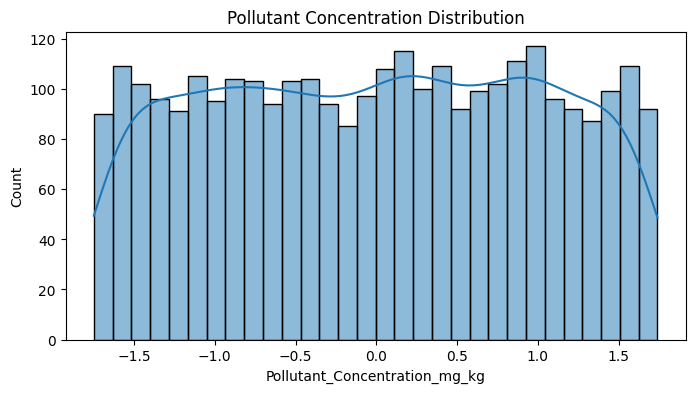

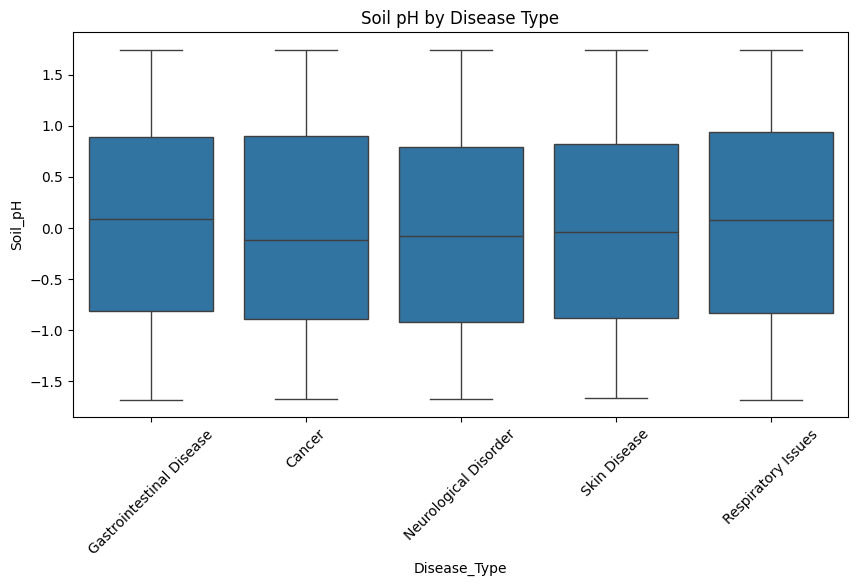

In [26]:

data = pd.read_csv("dataset/soil_pollution_diseases.csv")

data = data.dropna(subset=["Disease_Type", "Disease_Severity"])

categorical_cols = ["Crop_Type", "Farming_Practice"]
for col in categorical_cols:
    if col in data.columns:
        data[col + "_Encoded"] = LabelEncoder().fit_transform(data[col])

feature_cols = [
    "Pollutant_Concentration_mg_kg",
    "Soil_pH",
    "Temperature_C",
    "Humidity_%",
    "Rainfall_mm"
]


feature_cols += [col + "_Encoded" for col in categorical_cols if col + "_Encoded" in data.columns]


region_cols = [col for col in data.columns if col.startswith("Region_")]
water_cols = [col for col in data.columns if col.startswith("Water_Source_Type_")]
feature_cols += region_cols + water_cols


if "Pollutant_Concentration_mg_kg" in data.columns and "Soil_pH" in data.columns:
    data["Pollution_Risk"] = data["Pollutant_Concentration_mg_kg"] * (1 - data["Soil_pH"]/14)
    feature_cols.append("Pollution_Risk")


numeric_cols = ["Pollutant_Concentration_mg_kg", "Soil_pH", "Temperature_C", "Humidity_%", "Rainfall_mm", "Pollution_Risk"]
numeric_cols = [c for c in numeric_cols if c in data.columns]
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


X = data[feature_cols]
le_disease = LabelEncoder()
y = le_disease.fit_transform(data["Disease_Type"])


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, target_names=le_disease.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


xgb_clf = XGBClassifier(random_state=42, eval_metric="mlogloss")
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred_xgb, target_names=le_disease.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

mlp = MLPClassifier(hidden_layer_sizes=(128,64), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_nn = mlp.predict(X_test)

print("=== NEURAL NETWORK ===")
print(classification_report(y_test, y_pred_nn, target_names=le_disease.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))


if "Disease_Severity" in data.columns:
    if data["Disease_Severity"].dtype == object:
        severity_mapping = {"Mild":1, "Moderate":2, "Severe":3}
        data["Severity_Score"] = data["Disease_Severity"].map(severity_mapping)
    else:
        data["Severity_Score"] = data["Disease_Severity"]

    X_severity = data[feature_cols + ["Pollution_Risk"]] if "Pollution_Risk" in feature_cols else data[feature_cols]
    y_severity = data["Severity_Score"]

    
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_severity, y_severity, test_size=0.2, random_state=42)

    
    from sklearn.ensemble import RandomForestRegressor
    rf_reg = RandomForestRegressor(random_state=42)
    rf_reg.fit(X_train_s, y_train_s)
    y_pred_s = rf_reg.predict(X_test_s)

    mse = mean_squared_error(y_test_s, y_pred_s)
    print("\n=== DISEASE SEVERITY PREDICTION (Random Forest) ===")
    print(f"Mean Squared Error: {mse:.3f}")

plt.figure(figsize=(8,4))
sns.histplot(data["Pollutant_Concentration_mg_kg"], bins=30, kde=True)
plt.title("Pollutant Concentration Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="Disease_Type", y="Soil_pH", data=data)
plt.xticks(rotation=45)
plt.title("Soil pH by Disease Type")
plt.show()
